## Structured Outputs

In [1]:
from openai import OpenAI
from IPython.display import Image, display
import os
import base64
import pandas as pd
import dotenv
from dotenv import load_dotenv
from pydantic import BaseModel
import gpt_utils

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
# Load OpenAI API key for this project
dotenv.load_dotenv()
api_key = os.environ["OPENAI_API_KEY"]
client = OpenAI()

In [4]:
class CarYear(BaseModel):
    year: int

## Load Data 
[Stanford Cars dataset](https://paperswithcode.com/dataset/stanford-cars).

In [5]:
df = pd.read_csv('/scratch/shared/image_ai_HHT_data/train.csv', 
                 usecols=['image', 'Class', 'Class Name'])

In [6]:
df.shape

(5700, 3)

In [7]:
df.head()

,Class,image,Class Name
0,178,07149.jpg,Scion xD Hatchback 2012
1,24,06852.jpg,Audi S4 Sedan 2007
2,115,06627.jpg,Ford Focus Sedan 2007
3,4,06099.jpg,Acura TL Type-S 2008
4,105,05651.jpg,Fisker Karma Sedan 2012


In [8]:
image_dir = '/scratch/shared/image_ai_HHT_data/images/'

In [9]:
# Add image path column
df['image_path'] = image_dir + df['image']

## Zero Shot Prompt with Structured Outputs

## Example 1

In [10]:
df[df['image'] == "08119.jpg"]

,Class,image,Class Name,image_path
2076,67,08119.jpg,Chevrolet Malibu Hybrid Sedan 2010,/scratch/shared/image_ai_HHT_data/images/08119.jpg


In [11]:
test_image = df[df['image'] == "08119.jpg"]['image_path'].values[0]

In [12]:
test_image

'/scratch/shared/image_ai_HHT_data/images/08119.jpg'

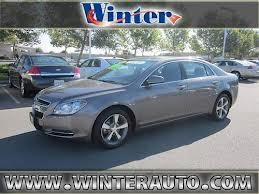

In [13]:
display(Image(filename=test_image))

In [14]:
model = "gpt-4o-2024-08-06"

In [15]:
encoded_image = gpt_utils.encode_image(test_image)
image_content = {
    "type": "image_url",
    "image_url": {
        "url": f"data:image/png;base64,{encoded_image}"}}

In [16]:
completion = client.beta.chat.completions.parse(
  model = model,
  messages = [  {"role": "user", "content": [{
                        "type": "text",
                        "text": "What is the year of the car in the image?" },
                    image_content
                ]}],
 response_format = CarYear)
print(completion.choices[0].message.parsed)

year=2010


In [17]:
for i in range(10):
    completion = client.beta.chat.completions.parse(
    model = model,
    messages = [  {"role": "user", "content": [{
                            "type": "text",
                            "text": "What is the make, model and year of the car in the image?" },
                        image_content
                    ]}],
    response_format=CarYear)
    print(f'{i} try: {completion.choices[0].message.parsed}')

0 try: year=2010
1 try: year=2013
2 try: year=2011
3 try: year=2013
4 try: year=2013
5 try: year=2012
6 try: year=2012
7 try: year=2010
8 try: year=2013
9 try: year=2010
